## Length of the report {-}
The length of the report must be no more than 15 pages, when printed as PDF. However, there is no requirement on the minimum number of pages.

You may put additional stuff as Appendix. You may refer to the Appendix in the main report to support your arguments. However, your appendix is unlikely to be checked while grading, unless the grader deems it necessary. The appendix and references will not be included in the page count, and there is no limit on the length of the appendix.

**Delete this section from the report, when using this template.** 

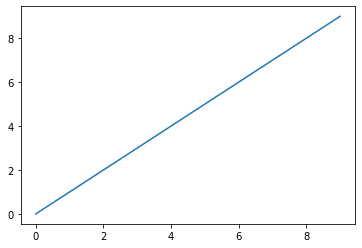

In [3]:
#| echo: false
import matplotlib.pyplot as plt
plt.plot(range(10));

## Code should be put separately in the code template {-}
Your report should be in a research-paper like style. If there is something that can only be explained by showing the code, then you may put it, otherwise do not put the code in the report. We will check your code in the code template. 

However, feel free to write code that prints output and then hide the code using the *yaml* setting as shown in an example below *(in the EDA section)*

**Delete this section from the report, when using this template.** 

## Background / Motivation

The Vinho Verde region of northwest Portugal brings affordable wines of diverse flavor profiles and complexities to everyday individuals [1]. As this region continues to gain influence and grow as a wine exporter, it is crucial that wineyard and consumers proportionally scale their ability to determine the quality of each wine variant (a key metric in identifying a wine's price and how it will sell). Quality is an important metric used in a wine’s certification process in the market. A wine's quality helps vintners determine how to properly price a wine, as well as how to market it [2].

However, wine quality is (at least at the moment) largely determined by sommeliers [2]. Though these individuals are experts in wine-tasting, sommeliers too are humans with subjective opinions and personal preferences in taste. Therefore, the industry has begun to support the sommelier-determined measure of quality through the measurement of objective physicochemical properties of wines, such as pH and alcohol values.

In an effort to expand this practice, we built a series of models to predict sommelier-determined wine quality based on physicochemical properties of Vinho Verde wines. We were motivated to approach this topic in particular as all of our group members are bourgeoning young-adults of drinking age. Thus, we hoped to better learn about and understand wine practices through our project so that we may better approach our interactions with wine in the future. We are also all interested in the world of sommeliers and oenologists, and hope to  explore their practices and quality measurements through our research and modeling.

Given the great diversity in climate, grapes, and methods of winemaking in the Vinho Verde region and wine-production areas [1], this model would likely be generalizable when predicting the qualities of wines from other regions (especially those surrounding Vinho Verde). 

## Problem statement 

To approach our analysis, we first articulated our objective: to predict oenologist-determined wine qualities of Vinho Verde wines (on a 1 to 10 scale) using the physical and chemical attributes of those wines.

Although our objective involves predicting a response variable that has integer values from 1 to 10, we elected to approach this problem with regression (i.e., predicting the response on a continuous scale and rounding our predictions to integer values thereafter) instead of multi-classification.

We chose to approach this problem with regression because our response values (from 1 to 10) have an inherent order (as ordinal values), and the magnitude of the difference between consecutive values is meaningful. For example, the difference between "1" and "2" quality wines may be similar to the diffference between quality "9" and "10" wines. Regression helps to capture this relationship by considering the magnitude of the values. 


## Data sources

We elected to use data set entitled "Wine Quality Data Set" from the UCI Machine Learning Repository. The dataset can be accessed [here](https://archive.ics.uci.edu/ml/datasets/Wine+Quality). This dataset helped us to address our project by comprehensively cataloging the different qualities of over 6,000 red and white variants of Portuguese "Vinho Verde" wine from 2004 to 2007. A wine's quality is based on its physicochemical properties, and this data set included 10 of such properties - thus reinforcing its use in our goal to predict wine quality.

Our response variable here was wine quality, represented by the variable quality in this dataset. This value ranged from 1 to 10. The predictors we used included physicochemical attributes of wine such as pH, density, fixed and volatile acidity, citric acid content, residual sugars, chlorides, free sulfur dioxides and total sulfur dioxides, sulphates, alcohol quality, and wine type (red or white). There are 11 total predictors in the dataset: 10 continuous predictors one categorical predictor. There are 6,497 total observations in this dataset, and each observation erepresents a different wine sample.

## Stakeholders

Our project addresses the interests of three stakeholder groups: (1) wine producers, (2) restaurants and bars, and (3) oenologists and sommeliers.

**Wine producers** have a vested interest in predicting a wine's quality, as often quality equates to both a wine's performance in the market and its return on investment, or ROI. Higher quality wines are typically expensive. They thus yield a higher ROI than lower quality wines - and this direclty impacts wine producers. Wine producers invest copious amounts of time and money into cultivating different wine variants. Thus, our project benefits these stakeholders by offering them a measure to predict a wine's quality with accuracy and reliability - information that they may then use to either gauge a wine's performance in the market or to choose how to best spend their time and money (perhaps on wines that are will be more expensive and will thus financially benefit them more).

**Restaurant and bar owners** who buy wine for their businesses may also be interested in assessing a wine’s quality. These stakeholders often buy wine from vineyards to sell in their businesses. They buy different wine variants with the goal of later selling them to customers for an upcharge. These stakeholders need to know the quality of the wines they are buying, as this metric informs how much restaurants and bars can charge for a given glass. Thus, our model may allow these stakeholders to assess the quality of the wines that they are considering for their establishments. By developing a model to predict a wine's quality, our project allows these stakeholders to not only assess a wine's quality overall (and thus figure out how to best market and charge for that wine), but also explore the range of wines to include (as, typically, restaurants include a variety of wine types and qualities - a "good mix" is encouraged to cater to diverse customer wants and needs).

Our third and final stakeholders include **oenologists and sommeliers**. Oenologists and sommeliers are currently working to establish defined measures for determining a wine's quality by evaluating its physiochemical characteristics. By incorporating these characteristics as predictors in our modeling processes, our project may offer these stakeholders a method to more easily and accurately determine a wine's quality through its make up - without having to spend exhaustive hours comparing one wine's composition to another's. This project offers a tool that, if accurate and reliable, could be leveraged by oenologists and sommeliers to better gauge the performance and quality of their industry's product.

## Data quality check / cleaning / preparation 


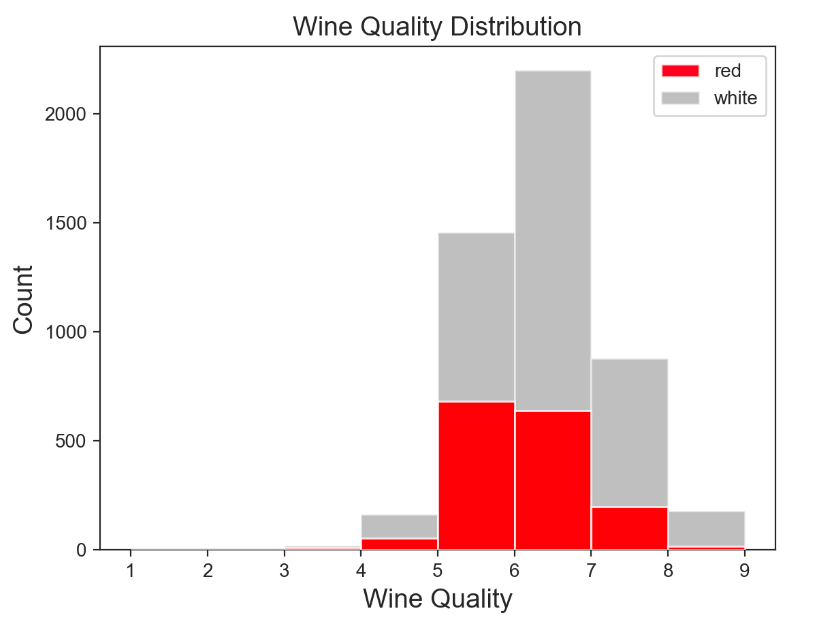 
The response variable, wine quality, is a continuous variable with a standard deviation of 0.87 and a mean of 5.82.



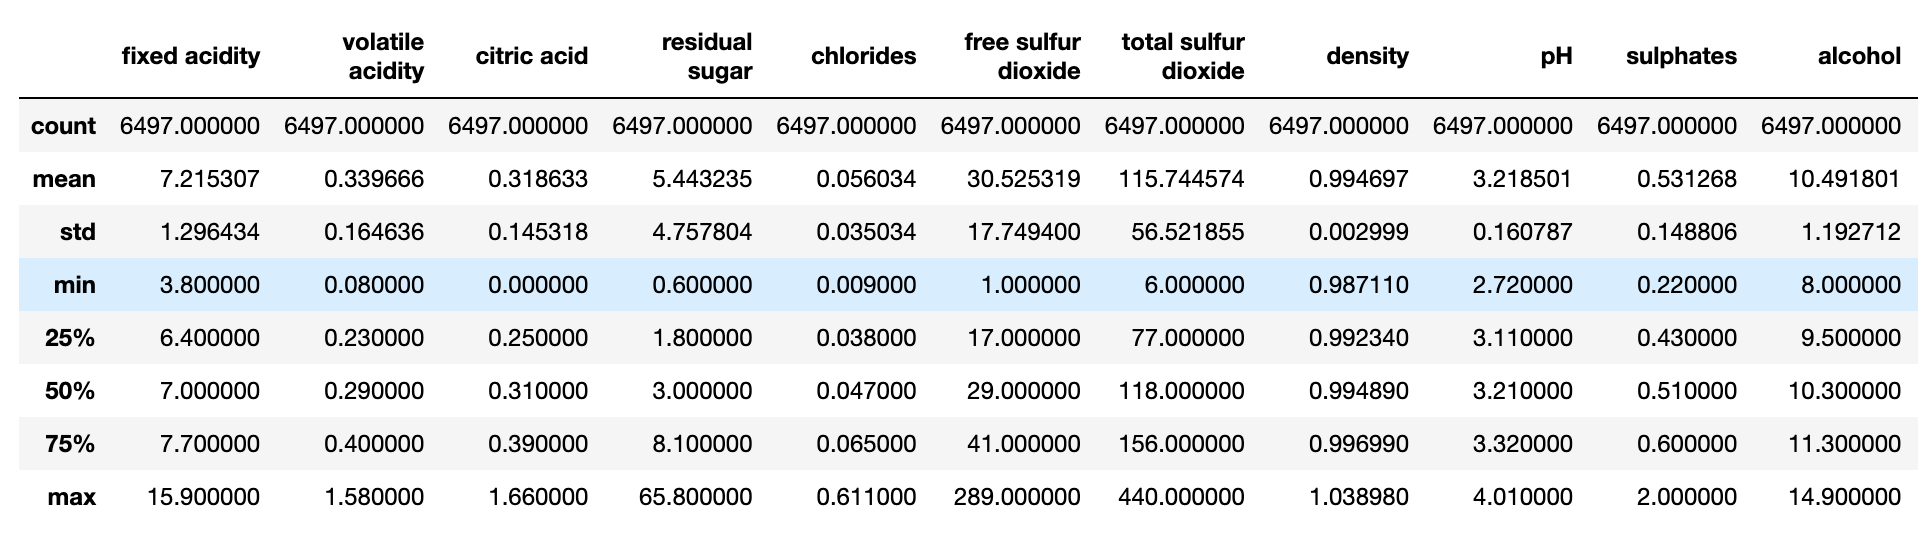


There are 11 continuous variables. There are no missing values for any predictors, and all values seem plausible (for example, the minimum and maximum pH values fall within the pH scale). The original data was split into two separate datasets--one for white wine and one for red wine. We decided to merge these datasets into one and create a new categorical variable, `type`, to describe whether the wine was red or white. Most wines in the new merged dataset are white, representing 75% of all samples.   

|             | `type`     |
| ----------- | ----------- |
| Levels      | 2 (White, Red) |
| Missing values   | 0        |
| Number of unique values   | 2        |
| Frequency at all levels   | {White : 4898, Change: 1599}   |


## Exploratory data analysis

If there is any EDA that helped with model development, put it here. If EDA didn't help then mention that, and you may show your EDA effort *(if any)* in the appendix.

List the insights (as bullet points), if any, you got from EDA  that ended up being useful towards developing your final model. 

If there are too many plots / tables, you may put them into appendix, and just mention the insights you got from them.

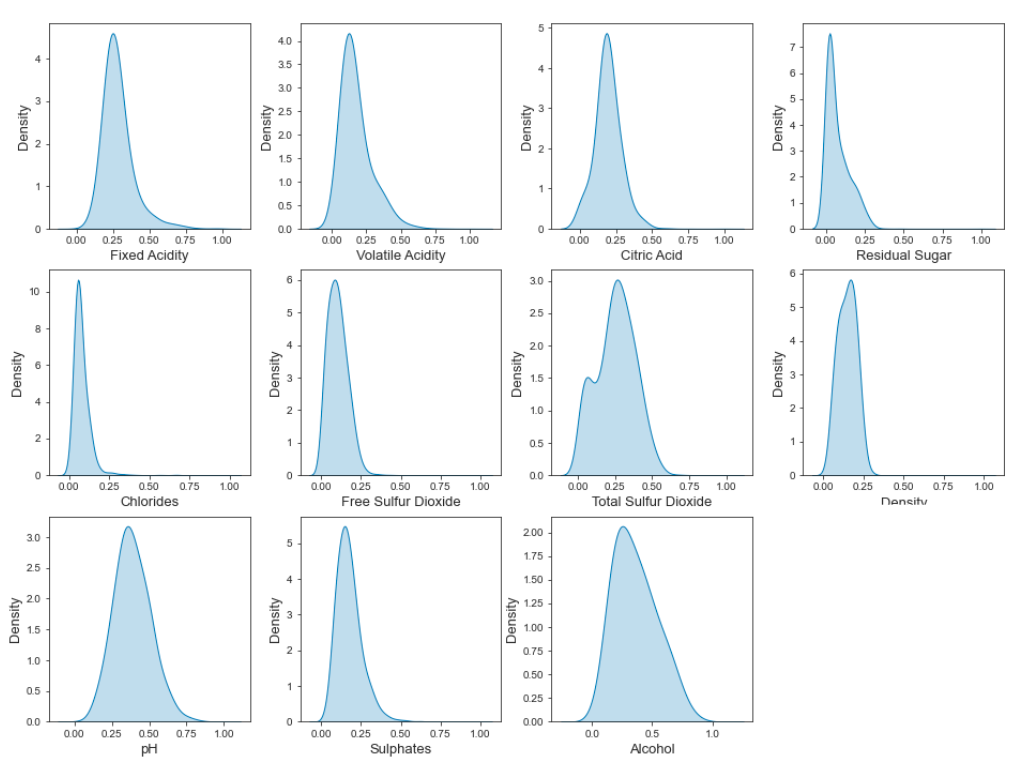

We visualized the predictor distributions and found that the majority of predictors had normal distributions. However, two predictors did not--residual sugar had a skewed distribution and total sulfur dioxide had a bimodal distribution. We scaled the predictors using MinMaxScaler instead of StandardScaler because the latter assumes that the predictors have normal distributions, which is not true for our dataset. MinMaxScaler scales the data to a range of 0 to 1 whereas StandardScaler scales the data to have a mean of 0 and standard deviation of 1. 

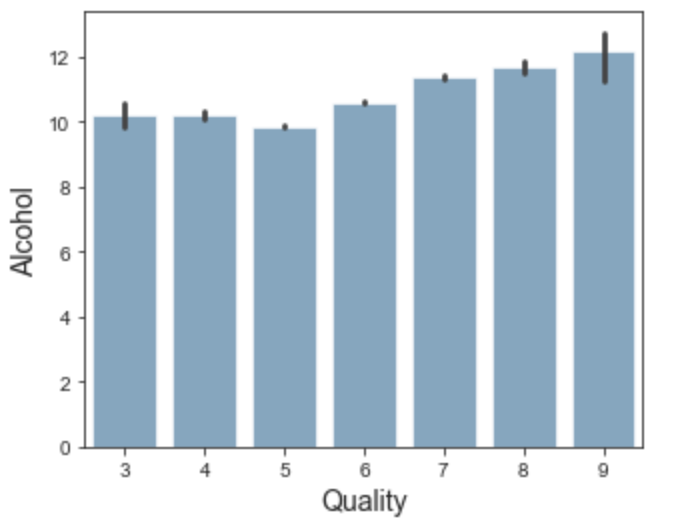

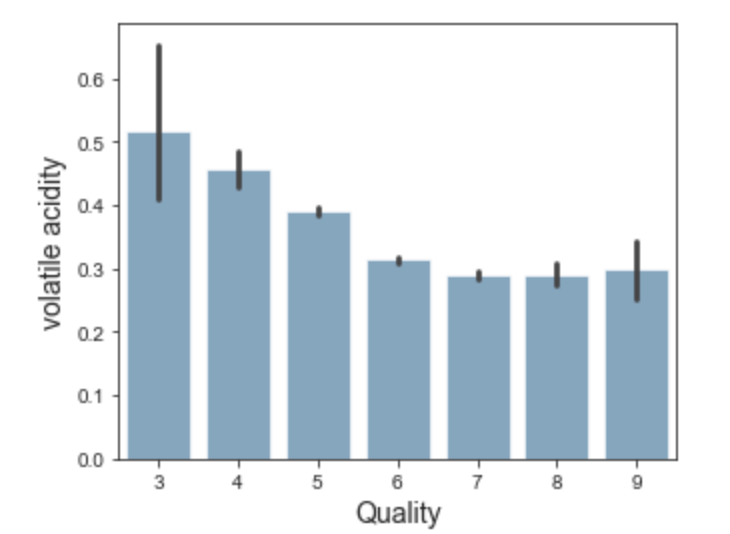

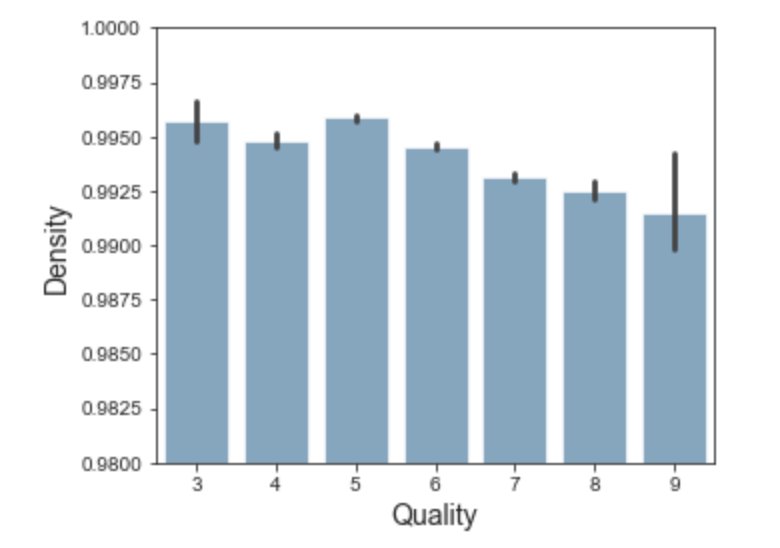

We visualized the relationship between each predictor and the response using a bar plot. Alcohol, volatile acidity, and density showed the distinct trends with wine quality, suggesting that these might be useful predictors. These predictors also had the highest correlation with wine quality. 

## Approach

What kind of a models did you use? What performance metric(s) did you optimize and why?

>We chose to use all models we learned this quarter including several tree-based methods and boosting methods. We also used lasso as a base linear model to compare our other models. We optimized our models for RMSE, as the error of each prediction is important. For example, predicting quality 2 wine as a quality 8 wine is worse than predicting a quality 5 wine as a quality 6 wine. 

Is there anything unorthodox / new in your approach? 

What problems did you anticipate? What problems did you encounter? 

Did your problem already have solution(s) (posted on Kaggle or elsewhere). If yes, then how did you build upon those solutions, what did you do differently? Is your model better as compared to those solutions in terms of prediction accuracy or your chosen metric?

**Important: Mention any code repositories (with citations) or other sources that you used, and specifically what changes you made to them for your project.**

## Developing the model: Hyperparameter tuning

Every person must describe their hyperparameter tuning procedure. Show the grid of hyperparameter values over which the initial search was done *(you may paste your grid search / random search / any other search code)*, and the optimal hyperparameter values obtained. After getting the initial search results, how did you make decisions *(if any)* to further fine-tune your model. Did you do another grid / random search or did you tune hyperparameters sequentially? If you think you didn't need any fine tuning after the initial results, then mention that and explain why.

Put each model in a section of its name and mention the name of the team-member tuning the model. Below is an example:

### Intercept Base Model
*By Anastasia Wei*

For the intercept base model, I took the mean of the train data response as the intercept and rounded the mean to be the predicted test response. This intercept model gave a rmse of 0.9327.

### Ridge and Lasso Regression
*By Anastasia Wei*

For Ridge Regression, I used the `Ridge` modulo from `sklearn` package. I chose a range from 15.8 to 5e-4 (`10**np.linspace(1.5,-3,200)*0.5`) as the tunning parameter alpha, and tuned the model using used `RidgeCV`. The optimal alpha = 0.01636 and results in a test rmse pf 0.8167.

For Lasso Regression, I used `Lasso` modulo from `sklearn` package. I chose a range from 0.5 yo 5e-6 (`10**np.linspace(2,-5,200)*0.5`) as the tunning parameter alpha, and tuned the model using a for loop looping over the parameters optimizing for model RMSE. The optimal alpha is found to be 0.0004301732208342255 results in a train rmse of 0.7806 and test rmse of 0.8138. <br>
See below for a plot of the train rmse vs alpha.
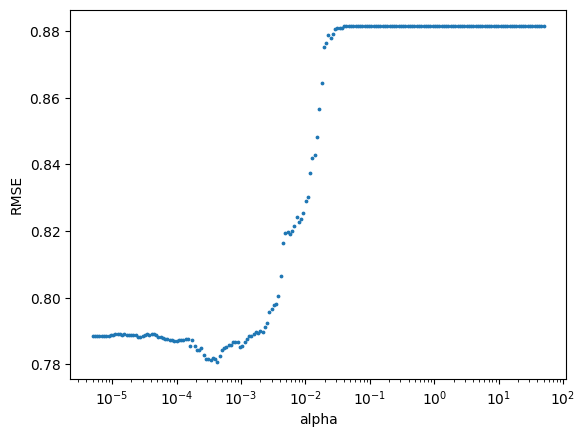

### MARS
*By Lila Wells*

### Decision Tree
*By Kaitlyn Hung*

### Bagging Decision Tree
*By Lila Wells*

### Random Forest
*By Amy Wang*

### AdaBoost
*By Kaitlyn Hung*

### Gradient Boosting
*By Anastasia Wei* <br>

I used the `GradientBoostingRegressor` from the `sklearn.ensemble` modulo with the huber loss function for the model. First I used 5 fold cross validation to get a sense of the number of estimators I need to reach a stable cross validation RMSE and found that around 1500 trees will be sufficient.
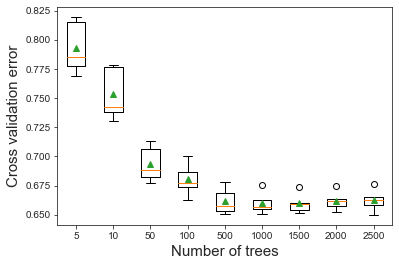
With this information, I started with a coarse grid search with 4 fold cross validation (to speed up the training process) using `RandomizedSearchCV` with 50 iterations. 

In [ ]:
grid['n_estimators'] = [1200, 1400, 1600, 1800]
grid['learning_rate'] = [0.1, 0.2, 0.3]
grid['max_depth'] = [8, 10, 12, 14]
grid['subsample'] = [0.4, 0.6, 0.8, 1]

And found a best cross validation RMSE of 0.6237 using `'subsample': 0.8, 'n_estimators': 1400, 'max_depth': 8, 'learning_rate': 0.1` and test RMSE of 0.6777. I visualized the parameters as follows: 
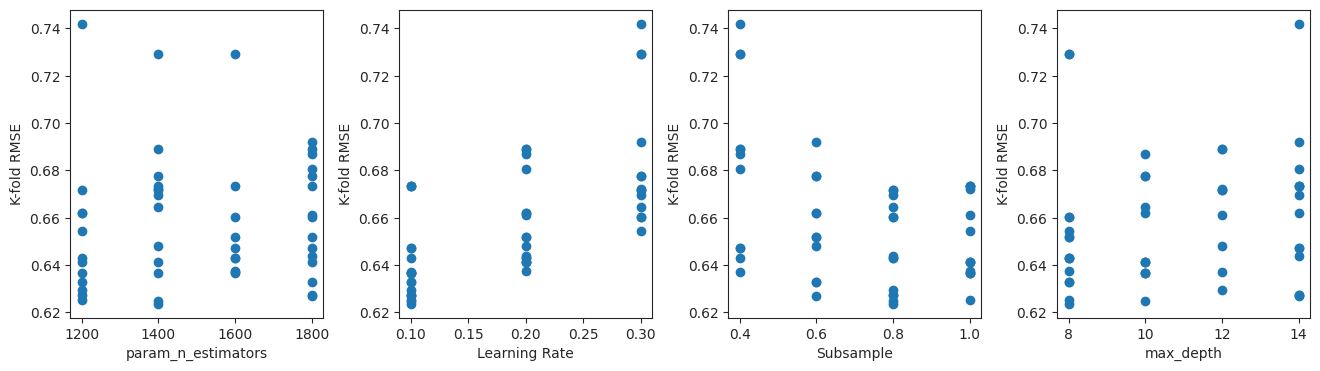
Then I implemented a finer tunning zooming in on the parameter space with the lowest k-fold RMSE. The search grid is as follows: 

In [ ]:
grid['n_estimators'] = [1300, 1350, 1400, 1450, 1500]
grid['learning_rate'] = [0.8, 0.1, 0.15]
grid['max_depth'] = [8, 9, 10]
grid['subsample'] = [0.7, 0.8, 0.9, 1]

And found a best cross validation RMSE of 0.6204 using `'subsample': 0.8, 'n_estimators': 1300, 'max_depth': 9, 'learning_rate': 0.1` and test RMSE of 0.6713. I visualized the parameters as follows: 
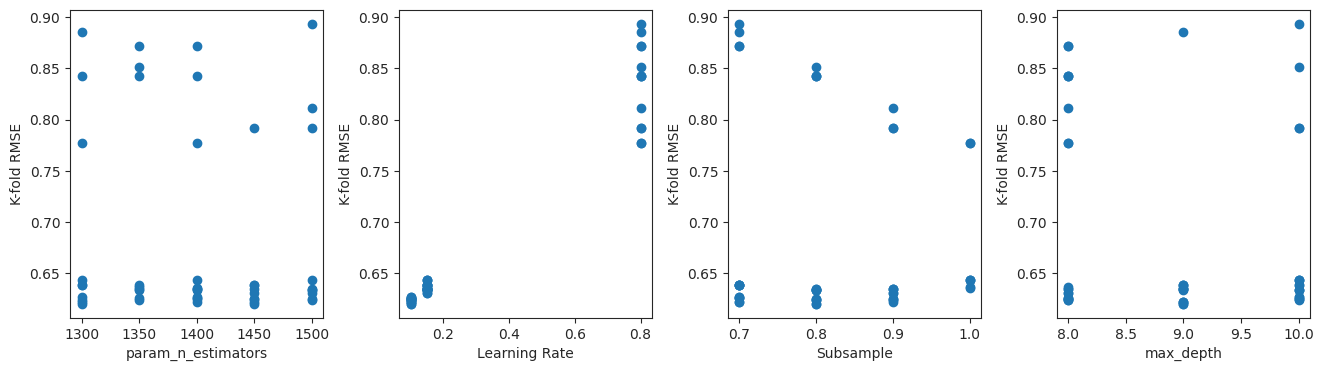

After this fine tuning, I did some manual tuning by making minor changes to the optimal parameters and combinations of parameters that are correlated (e.g. n_estimators and learning_rate) given by this tuning. However, the performance of the model did not change significantly. The only changed the improved the model significantly was increasing the subsample rate from 0.8 to 0.85. This resulted in a test RMSE of 0.6587.

### CatBoost, and LightGBM
*By Anastasia Wei*
I fit the data with `CatBoostRegressor` model from the `catboost` package using the default parameters and it gave a train RMSE of 0.4761 and a test RMSE of 0.7131. <br>
Then I also fit the data with a `LGBMRegressor` model from the `lightbm` package using the default parameters and it gave a train RMSE of 0.5211 and a test RMSE of 0.7259. <br>
We decided to include catboost and lightbm models to increase the diversity of the ensemble models and test to see whether they will happen to perform better than all of our other models; however these two models are not the focus of the project.

## Model Ensemble 

Put the results of enembling individual models. Feel free to add subsections in this section to add more innovative ensembling methods.

### Voting ensemble
*By Anastasia Wei* <br>

The simplest voting ensemble will be the model where all models have equal weights.

You may come up with innovative methods of estimating weights of the individual models, such as based on their cross-val error. Sometimes, these methods may work better than stacking ensembles, as stacking ensembles tend to overfit.

I used the `VotingRegressor` from `sklearn.ensemble` as the voting ensemble model. I chose to only use the xgboost, adaboost, random forest, gradient boost, and bagging models as the othe modeles (catboost, lgbm, lasso, ridge, mars) have a higher range of RMSE (> 0.7). This model gave a test RMSE of 0.651, lower than each of the individual models. <br>
See below for a plot of the actual vs predicted response. 
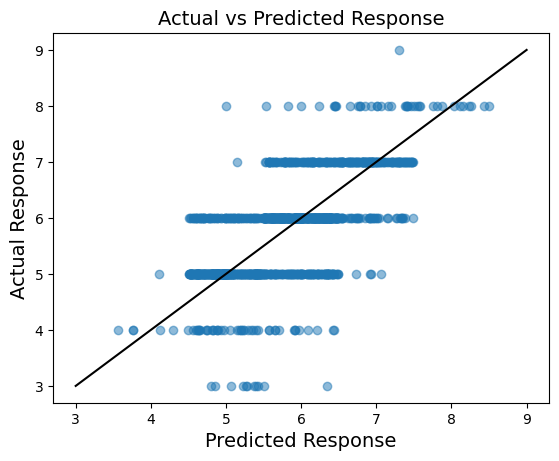

### Stacking ensemble
*By Anastasia Wei* <br>
Try out different models as the metamodel. You may split work as follows. The person who worked on certain types of models *(say AdaBoost and MARS)* also uses those models as a metamodel in the stacking ensemble.

I first fit each of the models mentioned about on the train and test dataset to create a new test and train datasets to fit the metamodels on. See the following subsections for the individual metamodels.
#### Linear Regression
Using `LinearRegression` from `sklearn.LinearModels` on the new train data set, I obtained a test RMSE of 0.6714.

#### Lasso
Using regularization parameter alphas in the range of `10**np.linspace(0, -3, 300)*0.5`, I tuned the model using LassoCV. With the optimal alpha of 0.0005, I obtained a test RMSE of 0.6598.

#### Mars
I fit a MARS model using `Earth` from `pyearth` package with degree 1 to avoid overfitting. This gave a test RMSE of 0.6593.

#### Random Forest
I tuned a random forest metamodel using the following parameter space with 4 fold cross validation with `RandomizedSearchCV` using 100 iterations. 

In [ ]:
param_grid = {'n_estimators': [100],
              'max_depth': [8, 10, 12, 14],
              'max_leaf_nodes':[100, 500, 1000],
              'max_features': [2, 4, 6, 8],
              'max_samples': [1000, 2000, 3000]}

The optimal parameters are the following `'n_estimators': 100, 'max_samples': 3000, 'max_leaf_nodes': 1000, 'max_features': 8, 'max_depth': 12`. The test RMSE is 0.6482 using these optimal parameters.

#### xgboost
I tuned a xgboost metamodel using the following parameter space with 4 fold cross validation with `RandomizedSearchCV` using 100 iterations. 

In [ ]:
param_grid = {'max_depth': [3, 4, 5, 6],
              'learning_rate': [0.008, 0.01, 0.025, 0.05],
              'reg_lambda':[0, 1, 5],
              'n_estimators':[500, 600, 800, 1000],
              'gamma': [0, 3, 5, 10],
              'subsample': [0.5, 0.75, 1.0],
              'colsample_bytree': [0.5, 0.75, 1.0]}

The optimal parameters are the following `'subsample': 0.75, 'reg_lambda': 0, 'n_estimators': 1000, 'max_depth': 6, 'learning_rate': 0.008, 'gamma': 0, 'colsample_bytree': 1.0`. The test RMSE is 0.6754 using these optimal parameters.

### Ensemble of ensembled models

If you are creating multiple stacking ensembles *(based on different metamodels)*, you may ensemble them.

Using the above 5 metamodels, I built a ensembled model of these metamodels using voting regression, simply averaging the predictions. The I tuned the cut off for rounding and found a optimal rounding threshold of 0.6869. Numbers with fractional amount greater than the threshold will be rounded up and vice versa. This resulted in a final rmse 0.6421, which is the lowest RMSE that we've achieved so far. <br>
See below for a plot of the actual vs predicted response for this final model.
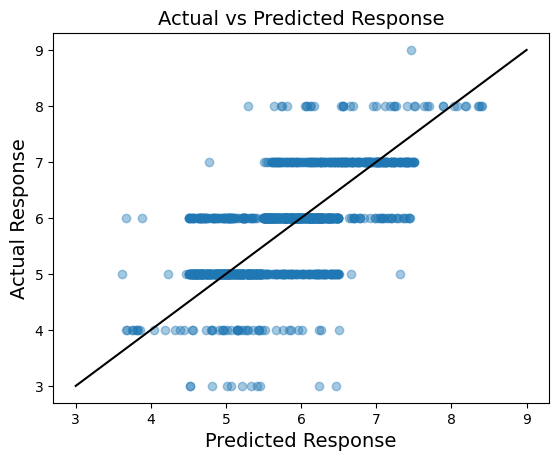

### Innovative ensembling methods
*(Optional)*

Some models may do better on certain subsets of the predictor space. You may find that out, and given a data point, choose the model(s) that will best predict for that data point. This is similar to the idea of developing a decision tree metamodel. However, decision tree is prone to overfitting.

Another idea may be to correct the individual models with the intercept and slope *(note the tree-based models don't have an intercept and may suffer from a constant bias)*, and then ensemble them. This is equivalent to having a simple linear regression meta-model for each of the individual models, and then ensembling the meta-models with a meta-metamodel or a voting ensemble.

## Limitations of the model with regard to prediction

Are you confident that you found the optimal hyperparameter values for each of your individual models, and that your individual models cannot be better tuned? Or, are there any models that could be better tuned if you had more time / resources, but you are limited by the amount of time you can spend on the course project *(equivalent to one assignment)*? If yes, then which models could be better tuned and how?

Will it be possible / convenient / expensive for the stakeholders to collect the data relating to the predictors in the model. Using your model, how soon will the stakeholder be able to predict the outcome before the outcome occurs. For example, if the model predicts the number of bikes people will rent in Evanston on a certain day, then how many days before that day will your model be able to make the prediction. This will depend on how soon the data that your model uses becomes available. If you are predicting election results, how many days / weeks / months / years before the election can you predict the results. 

When will your model become too obsolete to be useful?

If we had more time and resources, the following can be implemented to make our model prediction better: <br>
The catboost and lgbm models can be tuned to perform better. <br>
The ensemble models can perform better if we predicted residuals for each of the model and subtracted from the test prediction, tune the rounding threshold for each of the model, and then use this new prediction with the subtracted residuals as the new train and test data. <br>
We could also potentially build more ensemble models that are more distinct from each other to create the ensemble of the meta models.

## Future Work

Future work in the wine quality prediction space may benefit from more recent data. Our dataset was amalgamated between 2004 and 2007, though new wines have been cultivated each year in the Vinho Verde region, with differing weather patterns and soil qualities that affect their chemical properties, taste, and quality. Modeling wine quality with more recent wines may better allow researchers to explore wines that are more likely being produced, bought, and consumed by the public today (though it is likely that many wines tested in this study are still being aged and consumed by the public, just to a smaller extent). Thus, one potential avenue of future inquiry within this research community could include studying wines from the last decade to study the qualities and chemical compositions of more recent wines -- especially amidst global warming, which affects weather patterns, soil qualities, and ultimately the chemical compositions of wines in regions like Vinho Verde [3].

## Conclusions and Recommendations to stakeholder(s)

What conclusions do you draw based on your model? You may draw conclusions based on prediction accuracy, or other performance metrics.

How do you use those conclusions to come up with meaningful recommendations for stakeholders? The recommendations must be action-items for stakeholders that they can directly implement without any further analysis. Be as precise as possible. The stakeholder(s) are depending on you to come up with practically implementable recommendations, instead of having to think for themselves.

If your recommendations are not practically implementable by stakeholders, how will they help them? Is there some additional data / analysis / domain expertise you need to do to make the recommendations implementable? 

Do the stakeholder(s) need to be aware about some limitations of your model? Is your model only good for one-time use, or is it possible to update your model at a certain frequency (based on recent data) to keep using it in the future? If it can be used in the future, then for how far into the future?

Add details of each team member's contribution, other than the models contributed, in the table below.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 25%;">
       <col span="1" style="width: 40%;">
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Individual Model</th>
    <th>Work other than individual model</th>    
    <th>Details of work other than individual model</th>
  </tr>
  <tr>
    <td>Kaitlyn Hung</td>
    <td>Decision Tree & AdaBoost</td>
    <td>EDA</td>    
    <td> XXX</td>
  </tr>
  <tr>
    <td>Amy Wang</td>
    <td>Random Forest & XGBoost</td>
    <td>Data Preparation</td>    
    <td>XXX</td>
  </tr>
    <tr>
    <td>Anastasia Wei</td>
    <td>Ridge and Lasso Regression & Gradient Boosting</td>
    <td>Ensembling</td>    
    <td>Ensembling the metamodels, making the intercept model, and some EDA</td>
  </tr>
    <tr>
    <td>Lila Wells</td>
    <td>MARS and Bagging Decision Trees</td>
    <td>Presentation Assets</td>    
    <td>XXX</td> 
  </tr>
</table>

## References {-}

List and number all bibliographical references. When referenced in the text, enclose the citation number in square brackets, for example [1].

[1] Vinho Verde, "About Vinho Verde." https://www.vinhoverde.pt/en/about-vinho-verde. Supplied as additional material. 

[2] Cortez et. al, "Modeling wine preferences by data mining from physicochemical properties." Decision Support Systems (2009). https://www.sciencedirect.com/science/article/abs/pii/S0167923609001377?via%3Dihub. Supplied as additional material. 

[3] Gambetta et. al, "Global warming and wine quality: are we close to the tipping point?" Vint and Wine Open Access Journal (2021). https://oeno-one.eu/article/view/4774. Supplied as additional material. 

## Appendix {-}

You may put additional stuff here as Appendix. You may refer to the Appendix in the main report to support your arguments. However, the appendix section is unlikely to be checked while grading, unless the grader deems it necessary.

### Appendix A: Data Quality Check and Preparation